[*********************100%***********************]  1 of 1 completed


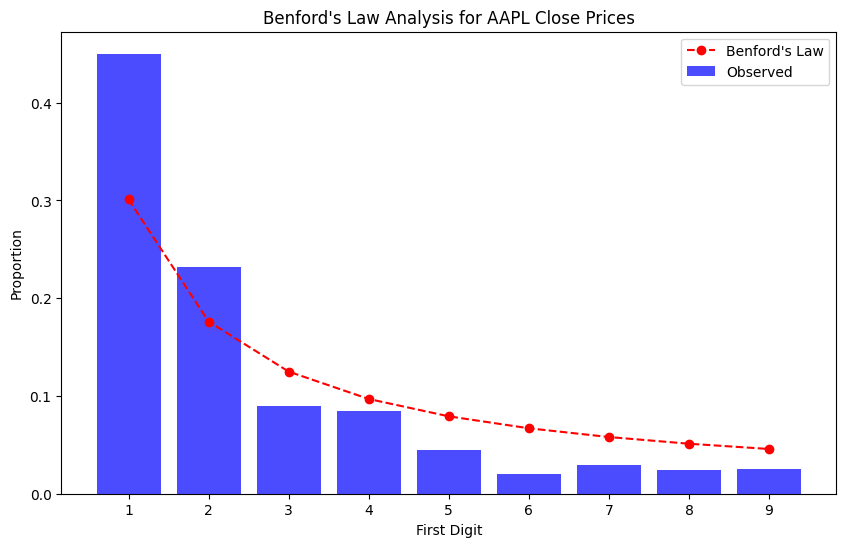

Chi-Square Statistic: 705.69027965211
p-value: 4.2618846052167503e-147
The data does not follow Benford's Law (reject the null hypothesis).


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Step 1: Download Stock Data
ticker = "AAPL"  # Example: Apple stock
data = yf.download(ticker, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d'))
data = data[['Close']]  # Use 'Close' prices
data.rename(columns={'Close': 'Price'}, inplace=True)

# Step 2: Extract the First Digit of Each Close Price
def get_first_digit(value):
    value = abs(value)  # Ensure positive values
    while value >= 10:
        value //= 10  # Remove trailing digits
    while value < 1:
        value *= 10  # Handle decimals
    return int(str(value)[0])  # Return the first digit

# Apply the function to extract first digits
data['First_Digit'] = data['Price'].map(get_first_digit)

# Step 3: Calculate the Observed Distribution
observed_counts = data['First_Digit'].value_counts().sort_index()
total_counts = observed_counts.sum()
observed_distribution = observed_counts / total_counts

# Step 4: Calculate the Expected Benford Distribution
benford_distribution = np.log10(1 + 1 / np.arange(1, 10))

# Step 5: Compare Observed and Expected Distributions
digits = np.arange(1, 10)
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_distribution, alpha=0.7, label="Observed", color="blue")
plt.plot(digits, benford_distribution, marker='o', color="red", label="Benford's Law", linestyle="--")
plt.title(f"Benford's Law Analysis for {ticker} Close Prices")
plt.xlabel("First Digit")
plt.ylabel("Proportion")
plt.xticks(digits)
plt.legend()
plt.show()

# Step 6: Perform Chi-Square Goodness-of-Fit Test
chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=benford_distribution * total_counts)
print("Chi-Square Statistic:", chi_square_stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("The data follows Benford's Law (fail to reject the null hypothesis).")
else:
    print("The data does not follow Benford's Law (reject the null hypothesis).")


In [ ]:
import seaborn as sns

In [ ]:
data['First_Digit']

,First_Digit
Date,
2010-01-04,7
2010-01-05,7
2010-01-06,7
2010-01-07,7
2010-01-08,7
...,...
2024-11-29,2
2024-12-02,2
2024-12-03,2


In [ ]:
df = pd.DataFrame(data['First_Digit'])

In [ ]:
df

,First_Digit
Date,
2010-01-04,7
2010-01-05,7
2010-01-06,7
2010-01-07,7
2010-01-08,7
...,...
2024-11-29,2
2024-12-02,2
2024-12-03,2


In [ ]:
#remove index in df
df.reset_index(drop=True, inplace=True)